 1.
 

In [2]:
 import pandas as pd

# URL of the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'

# Load the dataset
penguins = pd.read_csv(url)

# Display the first few rows of the dataset
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


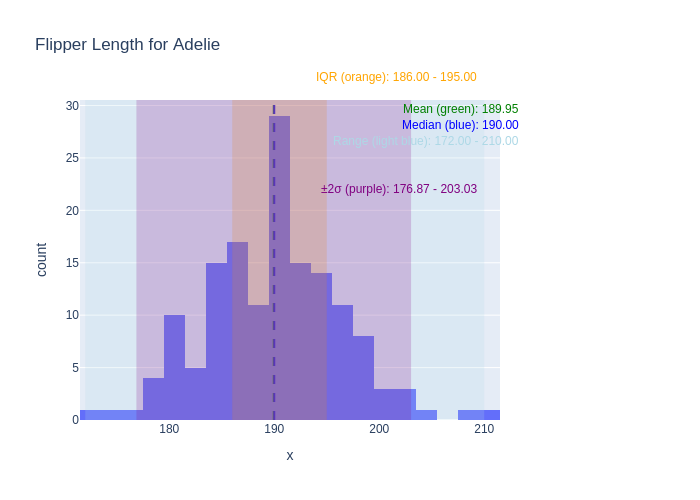

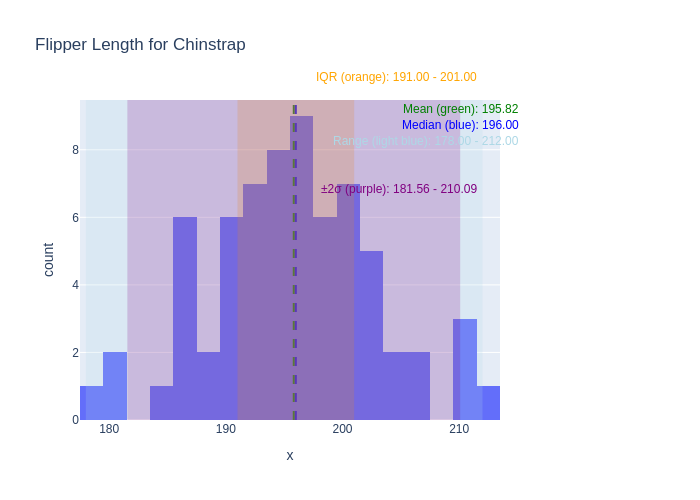

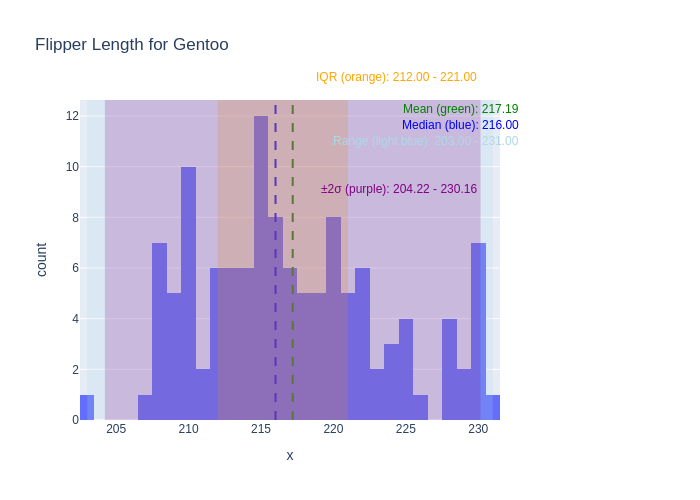

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(url)

# Remove any rows with missing values in the flipper_length_mm column
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Function to add markers for mean, median, and ranges
def add_stat_markers(fig, data, species_name):
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    flipper_min = data.min()
    flipper_max = data.max()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    std_dev = data.std()
    
    # Add lines for mean and median (annotations placed outside of the plot area)
    fig.add_vline(x=mean, line=dict(color='green', dash='dash'))
    fig.add_vline(x=median, line=dict(color='blue', dash='dash'))
    
    # Add annotation for mean outside the plot
    fig.add_annotation(
        xref='paper', yref='paper', x=1.05, y=1,
        showarrow=False, text=f"Mean (green): {mean:.2f}", font=dict(color="green", size=12)
    )
    
    # Add annotation for median outside the plot
    fig.add_annotation(
        xref='paper', yref='paper', x=1.05, y=0.95,
        showarrow=False, text=f"Median (blue): {median:.2f}", font=dict(color="blue", size=12)
    )
    
    # Add annotation for range (light blue) below the median annotation
    fig.add_annotation(
        xref='paper', yref='paper', x=1.05, y=0.90,
        showarrow=False, text=f"Range (light blue): {flipper_min:.2f} - {flipper_max:.2f}", font=dict(color="lightblue", size=12)
    )
    
    # Add rectangle for the range
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor="lightblue", opacity=0.2, line_width=0)
    
    # Add rectangle for the interquartile range (IQR) and move its annotation to the top
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.2, line_width=0)
    fig.add_annotation(
        xref='paper', yref='paper', x=0.95, y=1.1,
        showarrow=False, text=f"IQR (orange): {q1:.2f} - {q3:.2f}", font=dict(color="orange", size=12)
    )
    
    # Add rectangle for the range of two standard deviations from the mean
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor="purple", opacity=0.2, line_width=0)
    
    # Add annotation for ±2σ (purple) and move it slightly down
    fig.add_annotation(
        xref='paper', yref='paper', x=0.95, y=0.75,
        showarrow=False, text=f"±2σ (purple): {mean - 2 * std_dev:.2f} - {mean + 2 * std_dev:.2f}", font=dict(color="purple", size=12)
    )

# Create histograms for each species and add statistical markers
species_list = penguins['species'].unique()
for species in species_list:
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Create histogram
    fig = px.histogram(species_data, x=species_data, nbins=30, title=f'Flipper Length for {species}')
    
    # Add markers (mean, median, and ranges)
    add_stat_markers(fig, species_data, species)
    
    # Adjust the margin to accommodate outside annotations
    fig.update_layout(margin=dict(r=200, t=100))
    
    # Show the plot
    fig.show(renderer="png")


2.


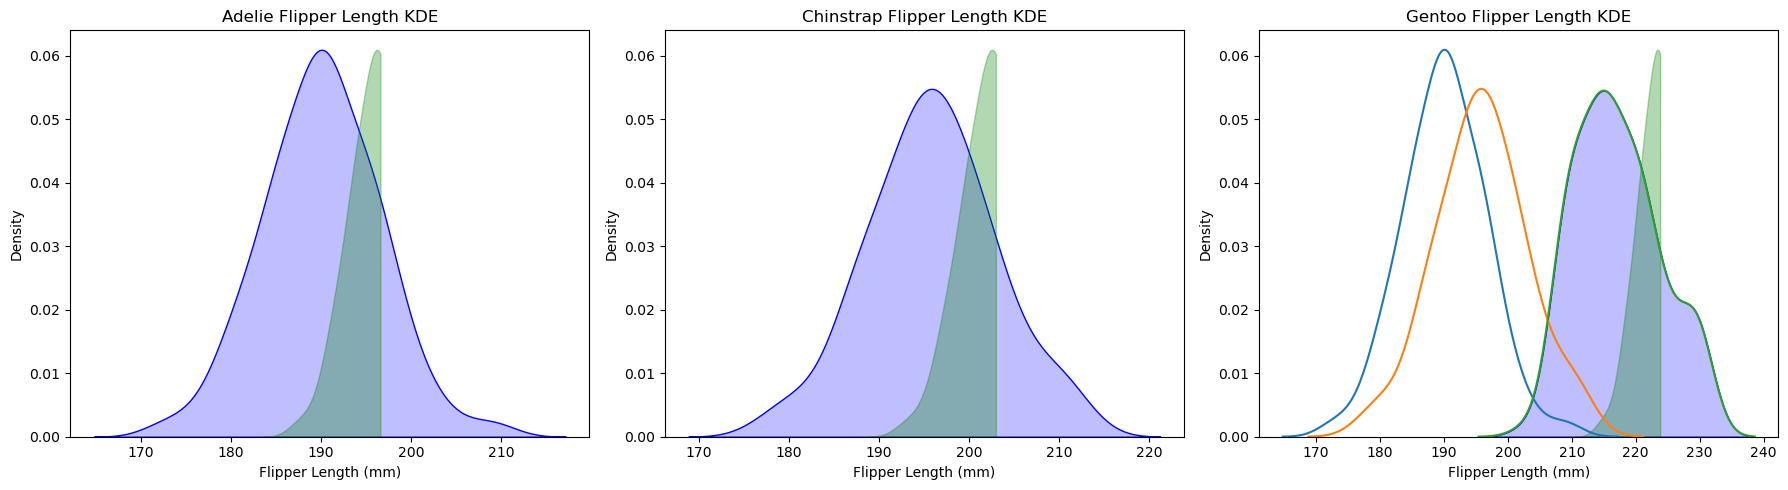

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(url)

# Drop rows with missing values
penguins = penguins.dropna()

# Set up the plot grid with 3 plots per row
species_list = penguins['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through each species and plot KDE with highlighted areas
for ax, species in zip(axes, species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Plot KDE using Seaborn
    sns.kdeplot(species_data, ax=ax, fill=True, color='blue')
    
    # Add a fill between using Matplotlib
    xmin, xmax = species_data.mean() - 1 * species_data.std(), species_data.mean() + 1 * species_data.std()
    x_vals = np.linspace(xmin, xmax, 100)
    y_vals = sns.kdeplot(species_data).get_lines()[0].get_ydata()
    
    # Fill between a specific range of the KDE curve
    ax.fill_between(x_vals, 0, y_vals[:len(x_vals)], color='green', alpha=0.3)
    
    # Customize title and labels
    ax.set_title(f'{species} Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


3.


ChatGPT Summary:

!!!chatgpt doesn't allow me to create a link for chat with a picture. So I save my chat history as a pdf in my repo!!!

Loading and Plotting the Penguins Dataset:

We started by loading the penguins dataset from the seaborn library using pandas in Python. I provided Python code to load the dataset using the URL and helped you understand how to process the data.
We then transitioned to using plotly and seaborn to visualize key statistics from the dataset, such as flipper_length_mm for each species of penguins.
Visualization with Plotly:

We discussed creating histograms using plotly to represent flipper_length_mm for each penguin species. We added vertical and horizontal lines/rectangles to highlight the mean, median, range, interquartile range (IQR), and boundaries defined by two standard deviations.
I helped troubleshoot overlapping labels for the notations on the plot, which involved repositioning the labels (for example, moving the labels for IQR and range).
You asked if values outside the light blue rectangles (representing ±2 standard deviations) were outliers, and I explained that these values are likely outliers, as they fall beyond the range of two standard deviations.
Seaborn Kernel Density Estimation (KDE):

We shifted focus to plotting using seaborn's KDE plot to visualize the distribution of flipper_length_mm for each penguin species. I provided code to plot these distributions in a grid format, one plot for each species.
We addressed warnings regarding the deprecated shade parameter, updating the code to use fill=True to maintain compatibility with seaborn's latest version.
I explained how seaborn extends matplotlib, allowing you to combine ax.fill_between() from matplotlib with seaborn’s KDE plots to add custom shading between KDE curves.
Explaining the KDE Plot:

You inquired about the meaning of the curves, and I explained that the blue line represents the smoothed distribution (the KDE curve) of flipper_length_mm, while any orange line likely represents another statistical marker, such as the mean or median.
After some clarification, we discussed that if the orange line was plotted by accident due to multiple calls to sns.kdeplot(), we could resolve the issue by adjusting the code.
Discussing Graph Types (Histogram, Box Plot, KDE):

You uploaded an image showing a histogram, KDE, box plot, and violin plot.
We discussed the strengths and weaknesses of each plot:
Histogram: Clear visual representation of distribution but sensitive to bin size.
Box Plot: Efficient for showing summary statistics (median, quartiles, outliers) and comparing groups, but it can hide some data details, like the shape of the distribution.
KDE Plot: Provides a smooth view of the data distribution, revealing modality and shape, but depends heavily on the choice of bandwidth.
I expanded on your observations about the usefulness of each plot and highlighted additional points, such as the trade-offs in using box plots versus histograms and KDE.

In [ ]:
#describe your preference for one or the other and your rationale for this preference

All of histogram, box plots, and kernel density have their advantages and limitations, but I would prefer histogram.
The reason is that histogram provides a simple graph but it actually shows most of the important information of the
data set like distribution, modality, and skewness which are essential for data analyzing. And there is another 
advantage that it can work with both discrete and continues datatype, so it is versatile.


4.


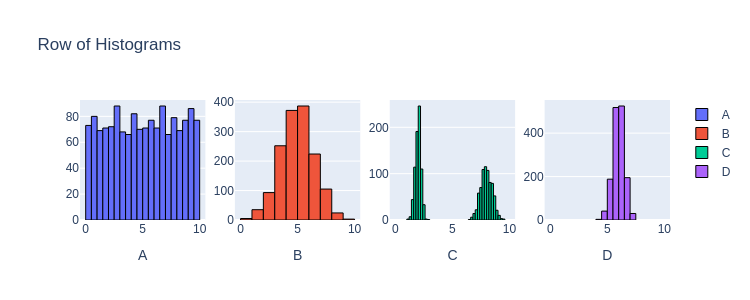

In [1]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
1.Which datasets have similar means and similar variances:
    A and C

In [ ]:
2.Which datasets have similar means but quite different variances:
    B and C

In [ ]:
3.Which datasets have similar variances but quite different means:
    B and D

In [ ]:
4.Which datasets have quite different means and quite different variances:
    A and D

5.


In [ ]:
In a left skewed graph, the mean is generally less than median. This is because the graph extends to left side and 
there are more extrame values that pull the mean downwards, while median is still near the modal.

In a right skewed graph, the mean is generally greater than median. With the similar idea, the graph extends to the
right and the extrame values on the right side pulls the mean to the right while medians stay in the middle.

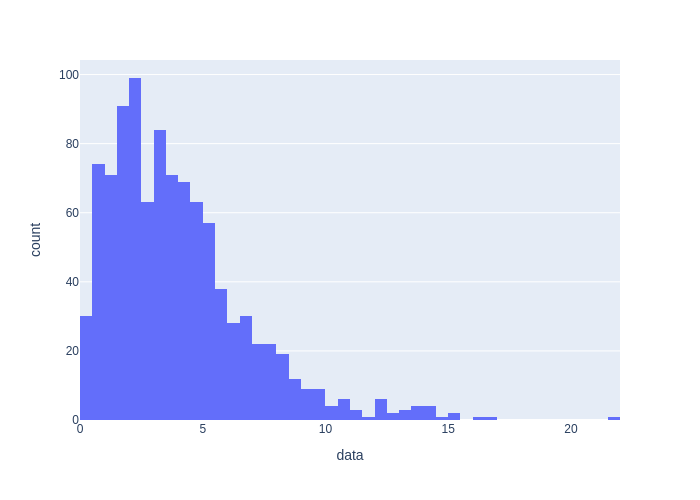

In [3]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px 

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000) # here created a right skewed data
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data") # visualizing the data
fig1.show(renderer = "png")


In [9]:
print("mean: " , sample1.mean())
np.quantile(sample1, [0.5]) # median


mean:  3.995147391559712


array([3.39847457])

By culculating the mean and median, we can verify that in right skewed graph, mean is greater than median.

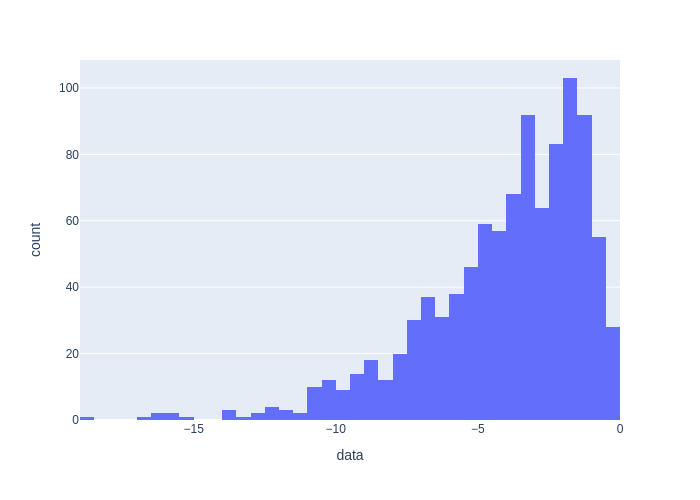

In [11]:
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)#generate a left skewed data
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data") # visualizing the data
fig2.show(renderer = "png")

In [12]:
print("mean: " , sample2.mean())
np.quantile(sample2, [0.5]) # median

mean:  -4.05878626747112


array([-3.36470474])

In [ ]:
This verifies that in a left skewed graph, the mean is smaller than median.

ChatGpt Summary 2:

https://chatgpt.com/share/66f59877-7d84-800b-95c7-d16190f392a2    

Summary of Interactions
Relationship Between Mean, Median, and Skewness:

You asked about the general relationship between the mean and median for skewed distributions. I explained that in right-skewed (positively skewed) distributions, the mean is greater than the median, while in left-skewed (negatively skewed) distributions, the mean is less than the median. This occurs because the mean is influenced by extreme values, while the median remains more resistant to these outliers.
Python Code Overview (Right and Left-Skewed Data Generation):

You shared a Python code snippet that generates right-skewed data using the Gamma distribution, visualizes it with a histogram, and computes its mean and median. I explained how the code works, particularly in generating right-skewed data, visualizing it using plotly.express, and calculating the mean and median.
The code also included generating left-skewed data by negating the values from the Gamma distribution, resulting in negative values for the mean and median.
NameError Issue (plotly.express Not Imported):

You encountered an error (NameError: name 'px' is not defined), and I explained that the issue was caused by plotly.express not being imported. I provided a corrected version of the code by adding the necessary import statement: import plotly.express as px.
Negative Mean and Median in Left-Skewed Data:

You noticed that the mean and median for the left-skewed data were negative. I explained that this happens because sample2 was created by negating the Gamma distribution data. Since all values were negative, the mean and median were also negative.
Making Left-Skewed Data Positive:

You asked how to make the negative values in sample2 positive. I suggested two methods:
Using np.abs(sample2) to take the absolute values, which makes all values positive.
Shifting the data by adding a constant to all values (e.g., sample2 + constant) to maintain the skewness while ensuring all values are positive.
I provided code for both methods and explained the potential impact on the data’s skewness when applying these transformations.

In [ ]:
6.


In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

# Get basic information about the dataset
df.info()

# Get summary statistics for numerical columns
df.describe()

# Check for missing values
missing_values = df.isnull().sum()

# Display the first few rows of the dataset
df.head()

# Print missing values
print("\nMissing values in each column:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   restaurant id                  750 non-null    int64  
 1   category id                    750 non-null    int64  
 2   item id                        750 non-null    int64  
 3   serving size (oz)              395 non-null    float64
 4   calories                       750 non-null    int64  
 5   calories from fat              260 non-null    float64
 6   total fat (g)                  750 non-null    object 
 7   total fat (% daily value)      260 non-null    float64
 8   saturated fat (g)              637 non-null    float64
 9   saturated fat (% daily value)  260 non-null    float64
 10  trans fat (g)                  637 non-null    float64
 11  cholesterol (mg)               637 non-null    float64
 12  cholesterol (% daily value)    260 non-null    flo

In [5]:
df

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [7]:
# Remove rows with any missing values
df_cleaned = df.dropna()

# Display the first few rows of the cleaned dataset
df_cleaned

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1000,108,255,10.1,510,150.0,17.0,26.0,9.0,44.0,...,80,27.0,1,4.0,64.0,12.0,15.0,0.0,40.0,8.0
256,1000,108,256,13.4,690,200.0,23.0,35.0,12.0,58.0,...,106,35.0,1,5.0,85.0,15.0,20.0,0.0,50.0,10.0
257,1000,108,257,6.7,340,100.0,11.0,17.0,6.0,29.0,...,53,18.0,1,2.0,43.0,8.0,10.0,0.0,25.0,6.0
258,1000,108,258,14.2,810,290.0,32.0,50.0,15.0,76.0,...,114,38.0,2,9.0,103.0,21.0,20.0,0.0,60.0,6.0


In [9]:
# Mean, median, and standard deviation for numerical columns only
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
std = df.std(numeric_only=True)

# Five-number summary (min, 25%, 50%, 75%, max) for numerical columns only
five_number_summary = df.describe().loc[['min', '25%', '50%', '75%', 'max']]

# Display the results
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nStandard Deviation:\n", std)
print("\nFive-number summary:\n", five_number_summary)


Mean:
 restaurant id                    2126.666667
category id                       113.685333
item id                           374.500000
serving size (oz)                  10.612996
calories                          296.149333
calories from fat                 127.096154
total fat (% daily value)          21.815385
saturated fat (g)                   3.409105
saturated fat (% daily value)      29.965385
trans fat (g)                       0.603297
cholesterol (mg)                   44.952904
cholesterol (% daily value)        18.392308
sodium (mg)                       361.554160
sodium (% daily value)             20.676923
carbohydrates (g)                  69.574667
carbohydrates (% daily value)      15.780769
dietary fiber (g)                   1.717333
dietary fiber (% daily value)       6.530769
sugars (g)                         25.718995
protein (g)                        11.398400
vitamin a (% daily value)          13.430141
vitamin c (% daily value)           7.954474
cal

<Figure size 1500x1000 with 0 Axes>

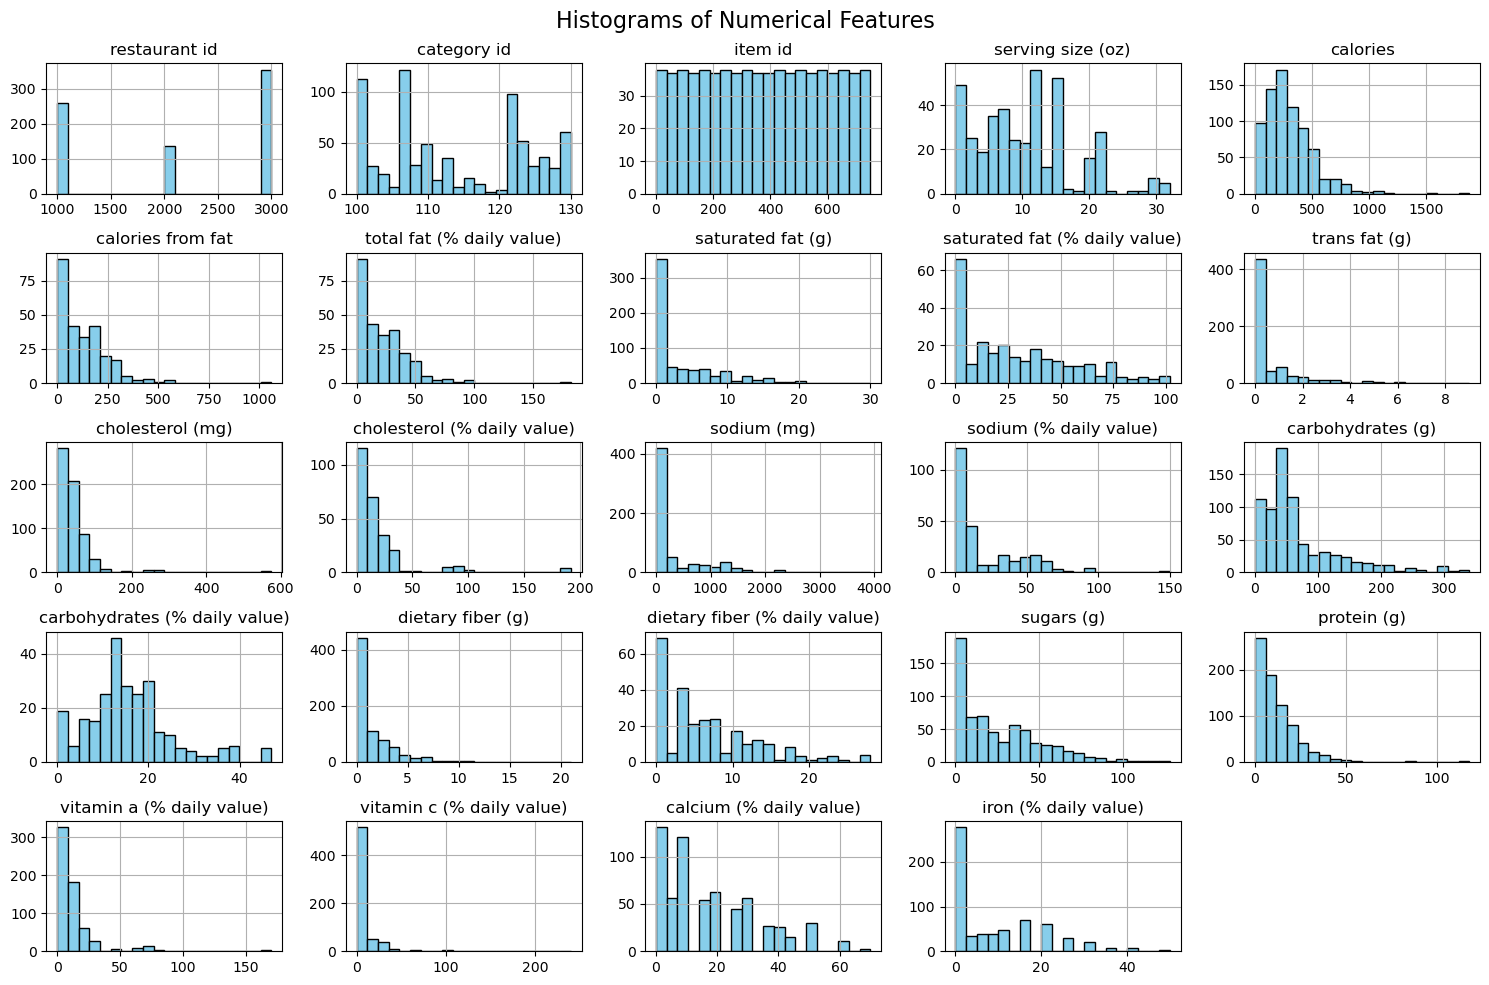

In [11]:
#historam

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create histograms for all numerical columns
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


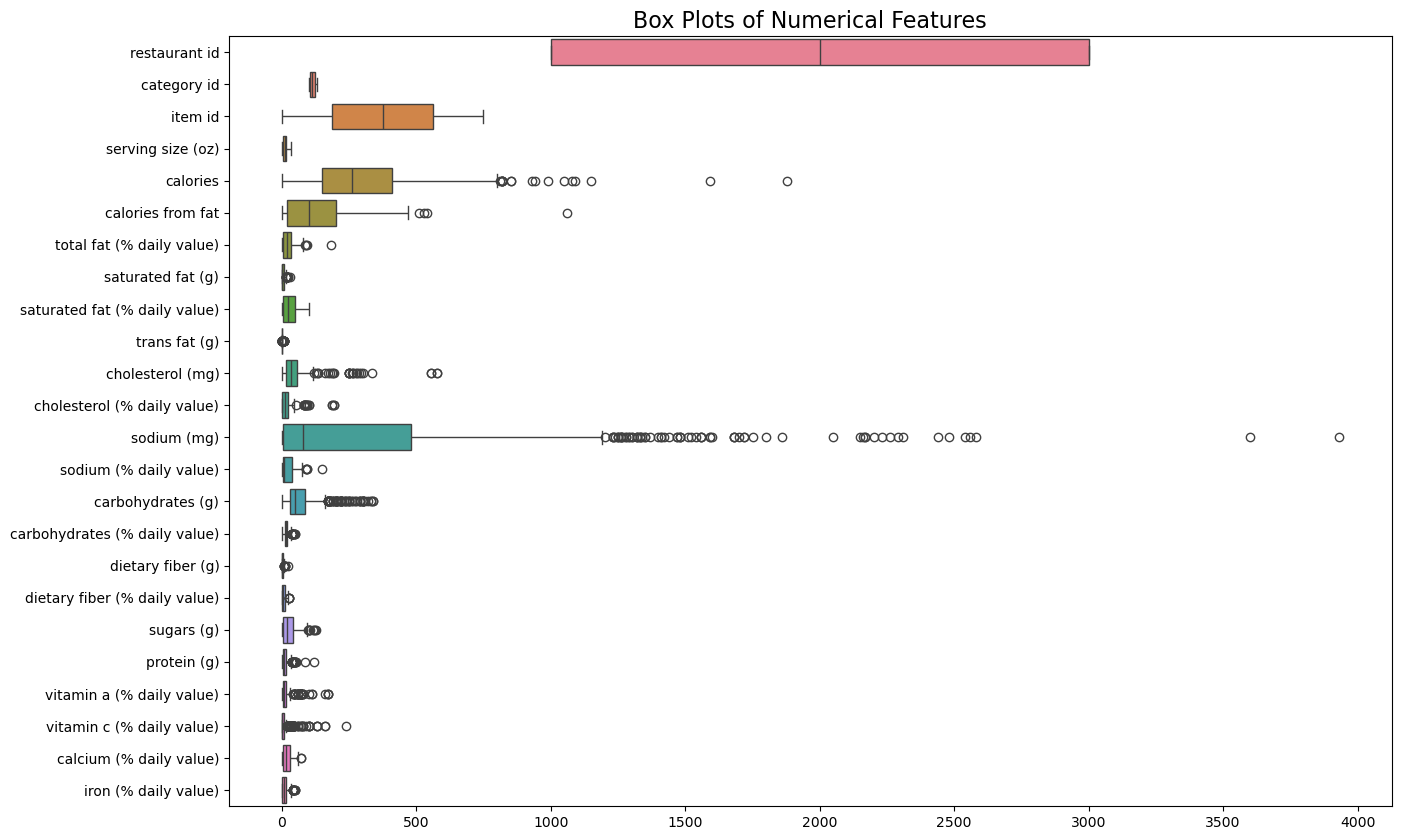

In [22]:
#box plot

# Create box plots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Numerical Features', fontsize=16)
plt.show()


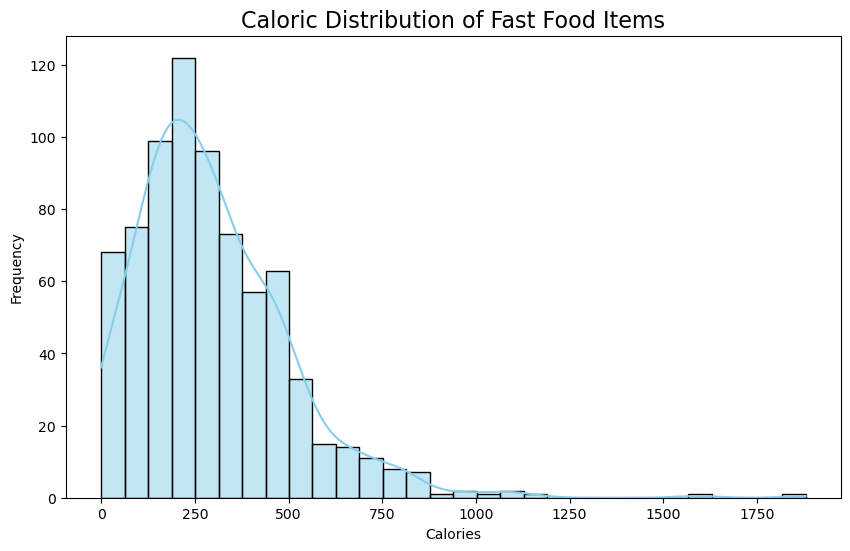

In [20]:

plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], bins=30, kde=True, color='skyblue')
plt.title('Caloric Distribution of Fast Food Items', fontsize=16)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


In [28]:
# Strip spaces and convert to lower case for consistency
df.columns = df.columns.str.strip().str.lower()


In [ ]:
Interesting aspects:

In [ ]:
1.Higher fat content can often correlate with higher calorie counts.

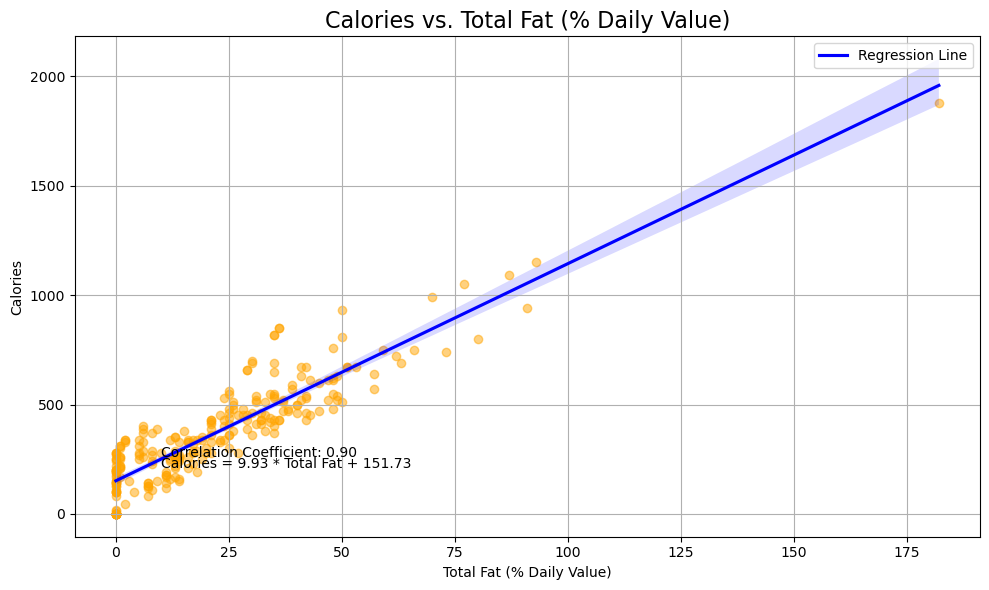

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation coefficient
correlation_coefficient = df['calories'].corr(df['total fat (% daily value)'])

# Fit the regression model
slope, intercept = np.polyfit(df['total fat (% daily value)'], df['calories'], 1)

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='total fat (% daily value)', y='calories', 
            scatter_kws={'alpha':0.5, 'color':'orange'}, 
            line_kws={'color':'blue', 'label':'Regression Line'})

# Add text for correlation coefficient and regression equation
plt.text(10, 260, f'Correlation Coefficient: {correlation_coefficient:.2f}', 
         fontsize=10, color='black')
plt.text(10, 210, f'Calories = {slope:.2f} * Total Fat + {intercept:.2f}', 
         fontsize=10, color='black')

# Add titles and labels
plt.title('Calories vs. Total Fat (% Daily Value)', fontsize=16)
plt.xlabel('Total Fat (% Daily Value)')
plt.ylabel('Calories')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjusts plot to make room for labels
plt.show()


In [ ]:
The graph above shows a positive correlation between total fat and calories. And the correlation coefficient is 0.8 
which means there is a strong association between them. So we can have a conclusion that:
Higher fat content can often correlate with higher calorie counts.

In [ ]:
2.Distribution of Sugar Content

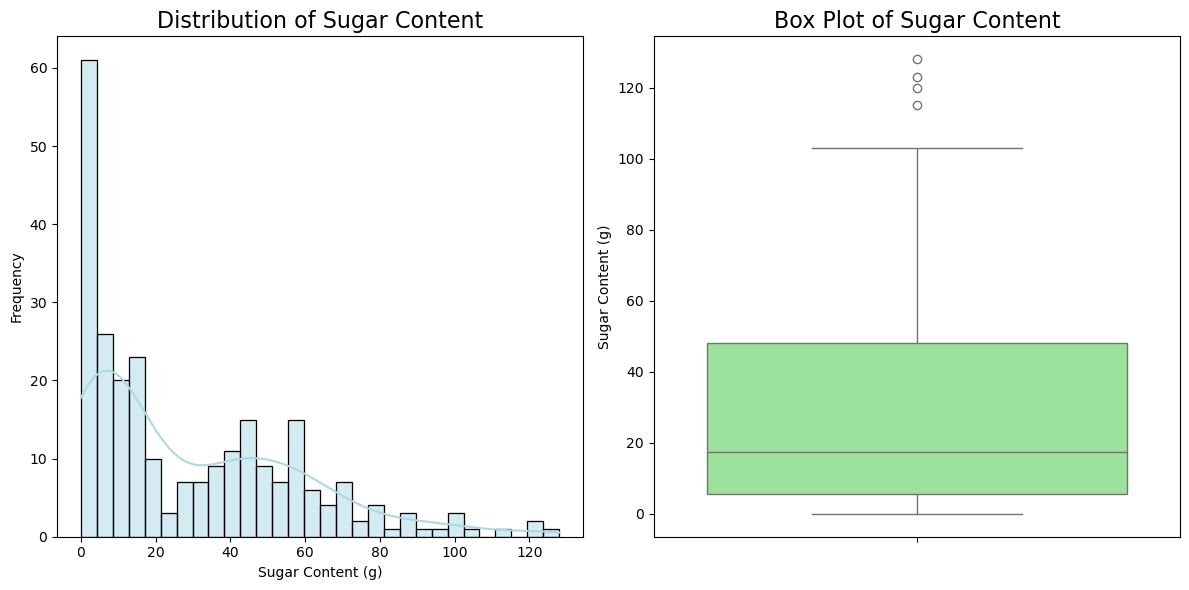

count    260.000000
mean      29.423077
std       28.679797
min        0.000000
25%        5.750000
50%       17.500000
75%       48.000000
max      128.000000
Name: sugars (g), dtype: float64


In [46]:
plt.figure(figsize=(12, 6))

# 1. Histogram of Sugar Content
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df['sugars (g)'], bins=30, kde=True, color='lightblue')
plt.title('Distribution of Sugar Content', fontsize=16)
plt.xlabel('Sugar Content (g)')
plt.ylabel('Frequency')

# 2. Box Plot of Sugar Content
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(data=df, y='sugars (g)', color='lightgreen')
plt.title('Box Plot of Sugar Content', fontsize=16)
plt.ylabel('Sugar Content (g)')

# Show the plots
plt.tight_layout()
plt.show()

# Calculate and display descriptive statistics for sugar content
sugar_stats = df['sugars (g)'].describe()
print(sugar_stats)

The histogram shows the distribution of sugar content among various fast food items.
If the histogram reveals a right-skewed distribution, this indicates that most items have low to moderate sugar content, while a few items have significantly higher sugar levels.

In [ ]:
3.energy-dense rankings

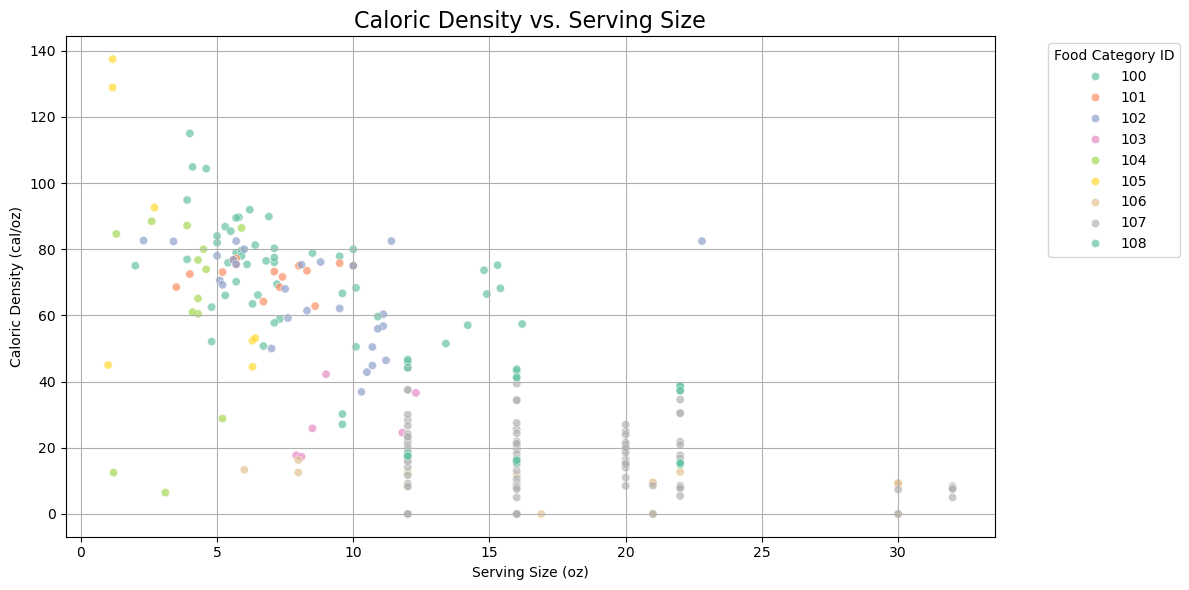

Top 10 Most Energy-Dense Items:
     item id  calories  serving size (oz)  caloric density (cal/oz)
104      104       160           1.164042                137.452085
105      105       150           1.164042                128.861330
39        39       460           4.000000                115.000000
10        10       430           4.100000                104.878049
11        11       480           4.600000                104.347826
2          2       370           3.900000                 94.871795
103      103       250           2.700000                 92.592593
13        13       570           6.200000                 91.935484
24        24       620           6.900000                 89.855072
7          7       520           5.800000                 89.655172


In [55]:
# Ensure 'serving size (oz)' is a numeric column
df['serving size (oz)'] = pd.to_numeric(df['serving size (oz)'], errors='coerce')

# Calculate caloric density (calories per ounce)
df['caloric density (cal/oz)'] = df['calories'] / df['serving size (oz)']

# Remove rows with NaN values in caloric density
df = df.dropna(subset=['caloric density (cal/oz)'])

# Set up the scatter plot using 'category id' for hue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='serving size (oz)', y='caloric density (cal/oz)', hue='category id', palette='Set2', alpha=0.7)
plt.title('Caloric Density vs. Serving Size', fontsize=16)
plt.xlabel('Serving Size (oz)')
plt.ylabel('Caloric Density (cal/oz)')
plt.legend(title='Food Category ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the top 10 most energy-dense items using 'item id'
top_energy_dense = df.nlargest(10, 'caloric density (cal/oz)')[['item id', 'calories', 'serving size (oz)', 'caloric density (cal/oz)']]
print("Top 10 Most Energy-Dense Items:")
print(top_energy_dense)

In [ ]:
This is an interesting data collection since it shows the top 10 energy-dense items. This indicates the items that 
are suitable for a quick bite to gain energy.

In [ ]:
Chatgpt Summary 3:

https://chatgpt.com/share/66f609ee-7990-800b-8996-47e0bc84aaf3

We worked on analyzing a fast food nutritional dataset to explore various aspects of the data, including fat content, sugar content, caloric density, and their relationships with other variables. The goal was to generate meaningful insights, support conclusions using summary statistics and visualizations, and correct code issues.

Steps and Key Insights:
Loading the Dataset:

We began by loading the dataset from the URL provided, ensuring the data was cleaned by handling missing values and standardizing column names to lowercase.
Summary Statistics:

Calculated key summary statistics such as mean, median, standard deviation, and five-number summaries for each numeric column.
Visualizations:

We created several visualizations to uncover relationships in the data:
Total Fat vs. Calories: We generated a scatter plot that showed a positive correlation between total fat content and calorie counts, supporting the hypothesis that higher fat content is often associated with higher calorie levels.
Sugar Distribution: A histogram demonstrated the distribution of sugar content across different fast food items, revealing that most items had moderate sugar levels, with a few outliers having high sugar content.
Caloric Density Analysis:

We computed the caloric density (calories per ounce of serving size) to investigate energy-dense items in the dataset. A scatter plot visualized the relationship between serving size and caloric density, highlighting which food categories had the most energy-dense items.
The top 10 most energy-dense items were also displayed, providing specific examples of high-calorie foods in the dataset.
Challenges and Adjustments:

We encountered some errors, such as issues with column names (e.g., using 'item id' instead of 'item', or missing columns like 'category').
Adjustments were made to ensure the correct column names were used, including:
'item id' for food items.
'category id' for food categories.
'serving size (oz)' for serving sizes.
Key Conclusions:

Higher fat content is correlated with higher calorie counts.
Distribution of sugar content reveals that most fast food items fall into moderate sugar ranges, with few extreme values.
Caloric density analysis shows that some items are very energy-dense despite small serving sizes, which may have implications for nutritional choices.
Example Code Snippets:
Below are some of the key code snippets used during the analysis:

Loading and Cleaning the Dataset:

python
Copy code
import pandas as pd
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)
df = df.dropna()  # Drop missing values
df.columns = df.columns.str.strip().str.lower()  # Standardize column names to lowercase
Caloric Density Analysis:

python
Copy code
# Calculate caloric density
df['caloric density (cal/oz)'] = df['calories'] / df['serving size (oz)']

# Scatter plot of caloric density vs serving size
sns.scatterplot(data=df, x='serving size (oz)', y='caloric density (cal/oz)', hue='category id', alpha=0.7)
plt.title('Caloric Density vs Serving Size')
plt.show()

# Top 10 energy-dense items
top_energy_dense = df.nlargest(10, 'caloric density (cal/oz)')[['item id', 'calories', 'serving size (oz)', 'caloric density (cal/oz)']]
print(top_energy_dense)
This summary reflects the core tasks and insights from our work, and it should serve as a useful record for your homework submission. Let me know if you'd like any more details or modifications!








7.


In [68]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="lifeExp", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
# Change color to represent life expectancy

In [ ]:
8.


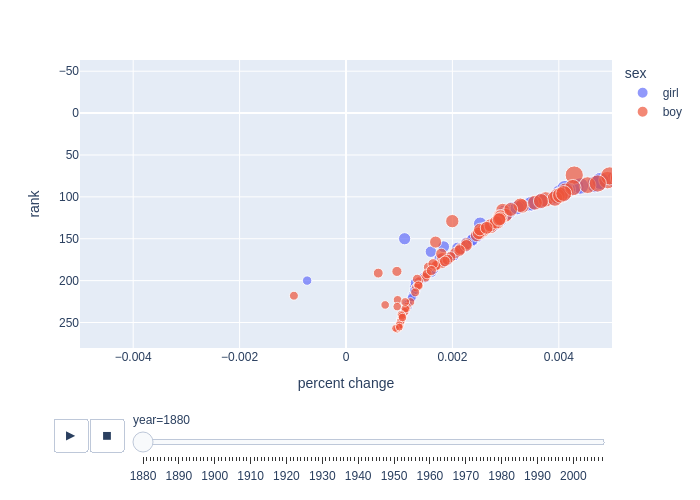

In [67]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
9.


In [ ]:
Somewhat.